In [10]:
import pandas as pd
import numpy as np

In [8]:
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statsmodels.api as sm
import json

In [3]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.2/580.2 kB 752.4 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
data = pd.read_excel("TSLA.xlsx", index_col=0, engine='openpyxl')
a = '%Y-%m-%d %H:%M:%S'
data.time = pd.to_datetime(data.time, format=a, errors='coerce')
data = data[data['time'].notna()]

In [14]:
data

,time,open,high,low,close,volume
0,2021-08-20 20:00:00,680.2,680.3,680.0,680.3,1357
1,2021-08-20 19:55:00,680.1,680.2,680.1,680.12,1247
2,2021-08-20 19:50:00,679.9,680.0,679.9,680.0,1039
3,2021-08-20 19:45:00,679.9,679.9,679.8,679.8,1444
4,2021-08-20 19:40:00,679.9999,680.0,679.9999,680.0,590
...,...,...,...,...,...,...
45017,2020-08-28 04:50:00,453.602,453.602,453.54,453.54,2855
45018,2020-08-28 04:35:00,454.012,454.012,454.0,454.0,3715
45019,2020-08-28 04:25:00,453.558,453.558,453.558,453.558,1370
45020,2020-08-28 04:10:00,452.0,452.0,452.0,452.0,1855


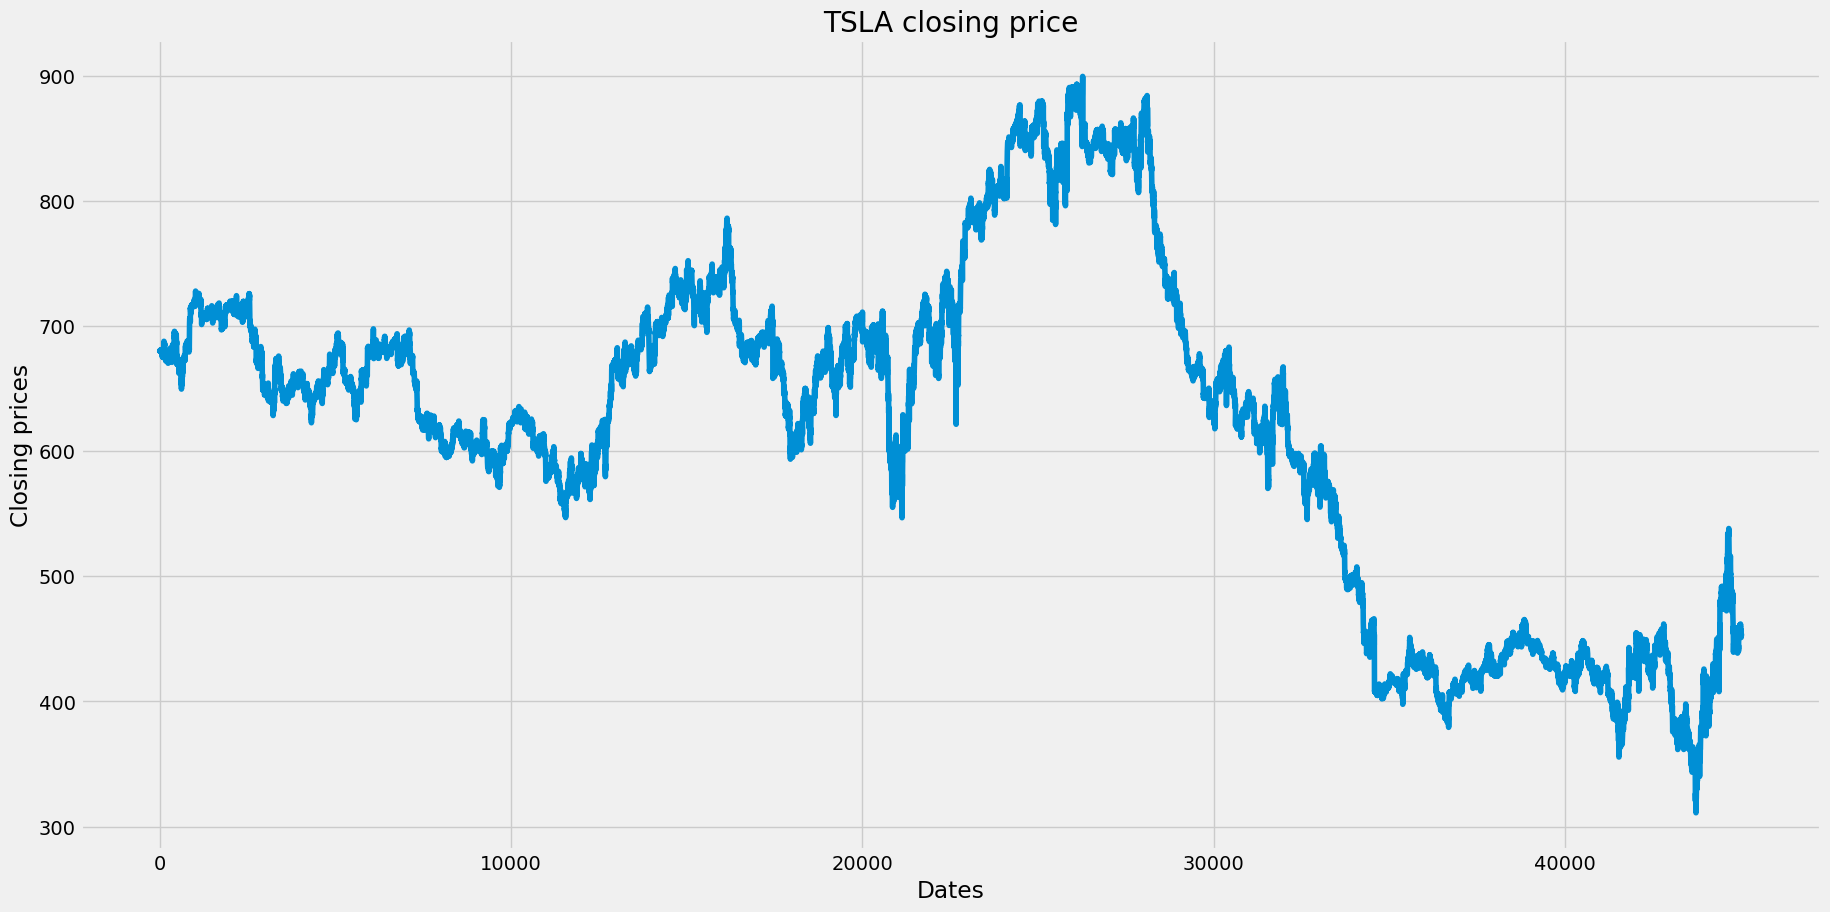

In [17]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(pd.to_numeric(data['close']))
plt.title('TSLA closing price')
plt.show()

In [31]:
data['close']

0          680.3
1         680.12
2          680.0
3          679.8
4          680.0
          ...   
45017     453.54
45018      454.0
45019    453.558
45020      452.0
45021    451.998
Name: close, Length: 45011, dtype: object

<Figure size 1000x600 with 0 Axes>

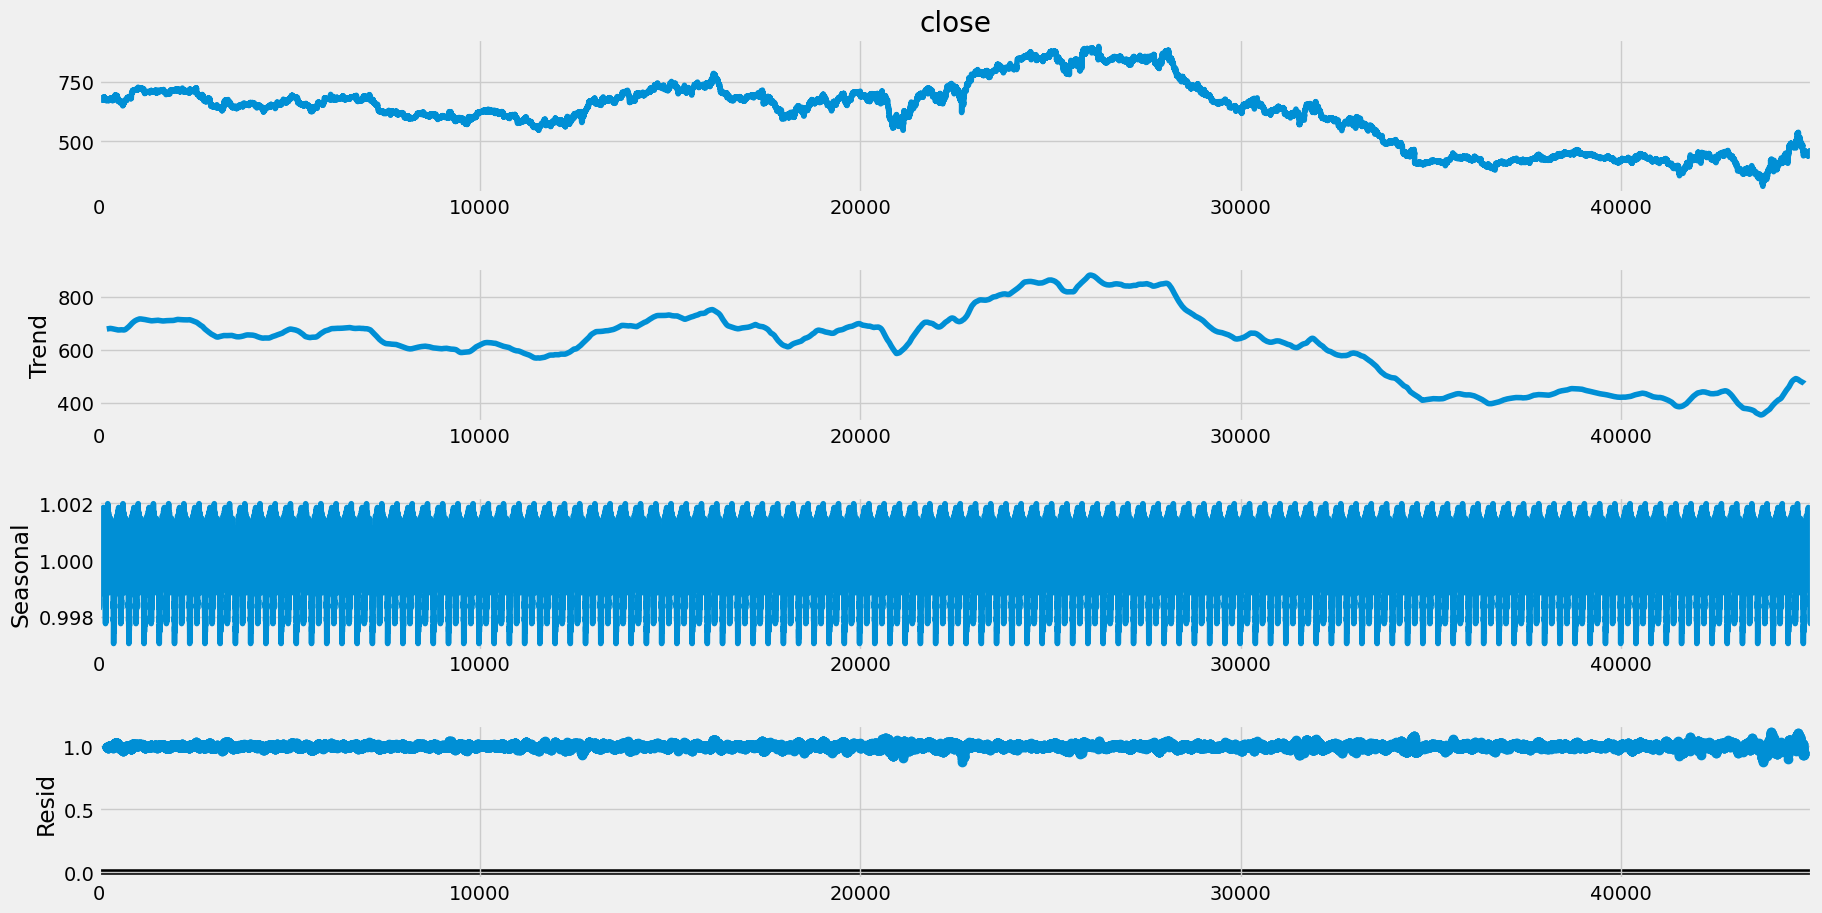

In [32]:
result=seasonal_decompose(df_close, model='multiplicative',period=400)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,10)

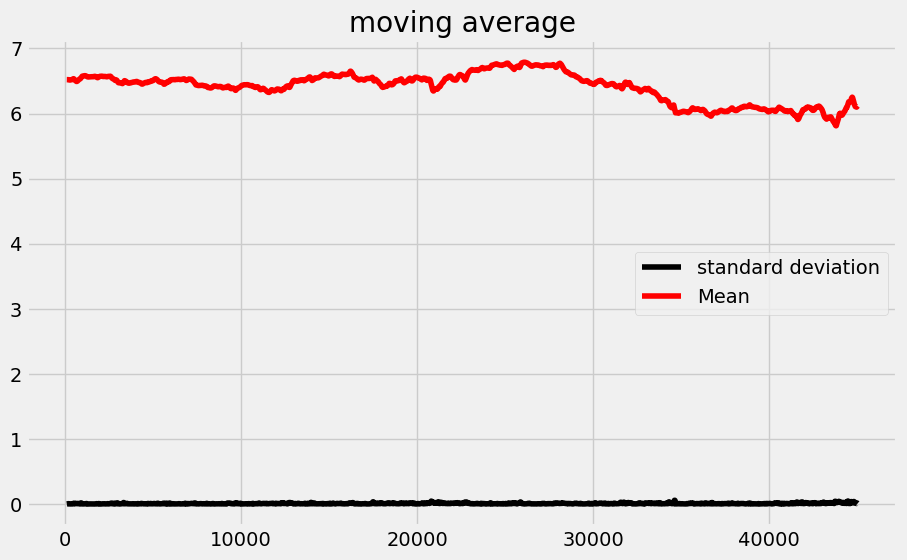

In [34]:
#moving average

df_close = pd.to_numeric(data['close'])
rcParams['figure.figsize'] = 10,6
df_log = np.log(df_close)
moving_avg = df_log.rolling(100).mean()
std_dev = df_log.rolling(100).std()

plt.title('moving average')
plt.plot(std_dev,color='black',label='standard deviation')
plt.plot(moving_avg, color='red',label='Mean')
plt.legend()
plt.show()

In [38]:
data = data[::-1].reset_index(drop=True)
data

,time,open,high,low,close,volume
0,2020-08-28 04:05:00,451.998,451.998,451.998,451.998,2820
1,2020-08-28 04:10:00,452.0,452.0,452.0,452.0,1855
2,2020-08-28 04:25:00,453.558,453.558,453.558,453.558,1370
3,2020-08-28 04:35:00,454.012,454.012,454.0,454.0,3715
4,2020-08-28 04:50:00,453.602,453.602,453.54,453.54,2855
...,...,...,...,...,...,...
45006,2021-08-20 19:40:00,679.9999,680.0,679.9999,680.0,590
45007,2021-08-20 19:45:00,679.9,679.9,679.8,679.8,1444
45008,2021-08-20 19:50:00,679.9,680.0,679.9,680.0,1039
45009,2021-08-20 19:55:00,680.1,680.2,680.1,680.12,1247


In [45]:
df_close = pd.to_numeric(data['close'
                             ])

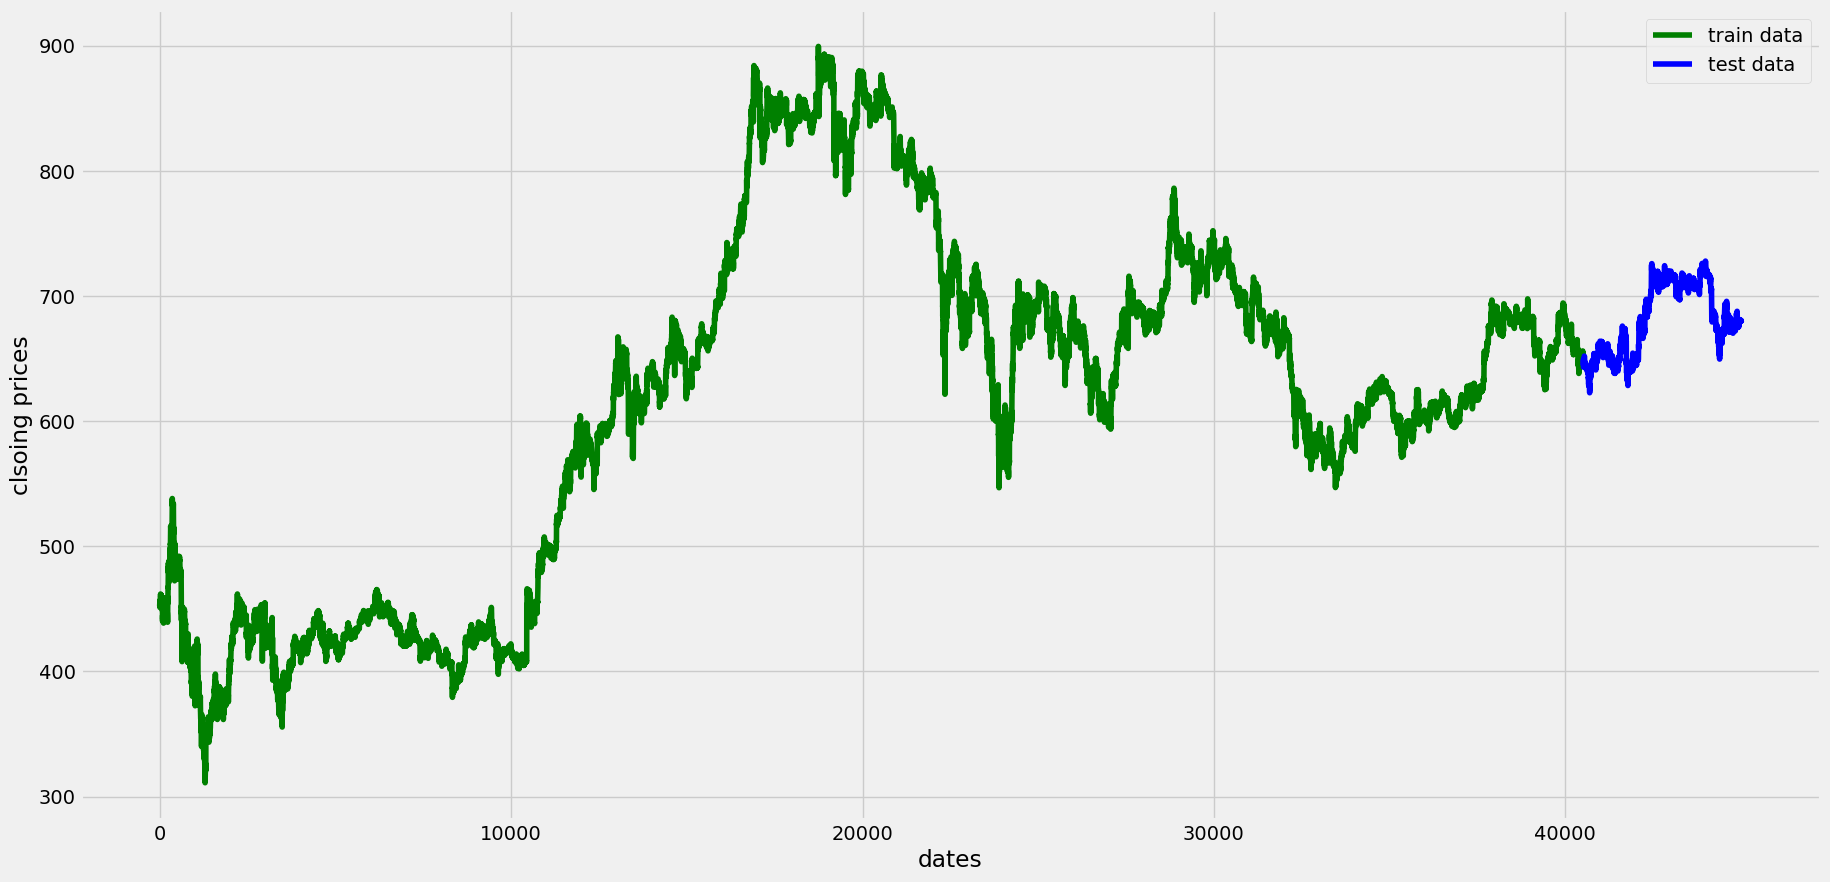

In [41]:
train_data, test_data = df_close[:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel("dates")
plt.ylabel("clsoing prices")
plt.plot(train_data, "green",label="train data")
plt.plot(test_data, "blue", label="test data")
plt.legend()


In [47]:
model_autoARIMA = auto_arima(df_close, start_p=0, start_q=0,
                             test='adf',
                             max_p=3, max_q=3,
                             m=1,
                             d=None,
                             seasonal = False,
                             start_P = 0,
                             D=0,
                             trace=True,
                             error_action = 'ignore',
                             suppress_warnings=True,
                             stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=183501.887, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=183422.854, Time=0.97 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=183419.965, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=183500.222, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=183416.957, Time=1.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=183401.743, Time=9.68 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=183408.540, Time=1.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=183390.977, Time=11.90 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=183393.490, Time=1.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=183381.723, Time=17.63 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=183379.729, Time=11.75 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=183403.320, Time=5.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=183381.726, Time=18.90 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=183389.683, Time=7.53 sec
 

In [50]:
model_info = model_autoARIMA.to_dict()
for key, value in model_info.items():
    if isinstance(value, pd.Series):
        model_info[key] = value.to_list()
model_info_json = json.dumps(model_info)
with open('ARIMA_model_TSLA.json','w') as fp:
    fp.write(model_info_json)

In [51]:
with open('ARIMA_model_TSLA.json','r') as fp:
    file = json.load(fp)
order = tuple(file['order'])

In [52]:
order

(2, 1, 2)

In [54]:
model = ARIMA(train_data, order=order)
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                40509
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -83737.125
Date:                Sun, 02 Apr 2023   AIC                         167484.249
Time:                        11:49:42   BIC                         167527.296
Sample:                             0   HQIC                        167497.867
                              - 40509                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7086      0.052     13.585      0.000       0.606       0.811
ar.L2         -0.5873      0.033    -17.539      0.000      -0.653      -0.522
ma.L1         -0.7523      0.052    -14.429      0.0

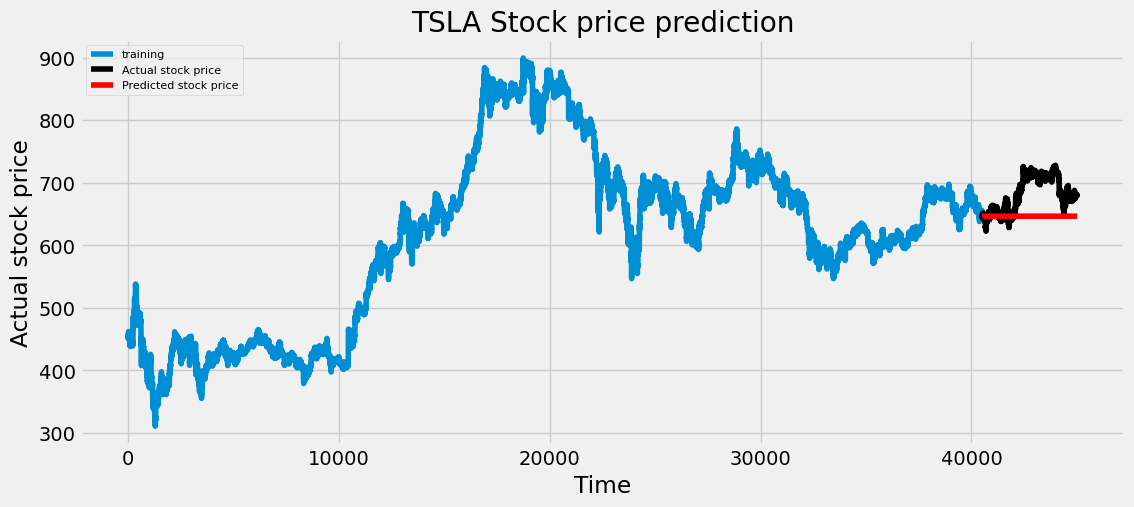

In [56]:
#forecast 

fc = fitted.forecast(len(test_data), alpha = 0.05)

fc_series = pd.Series(fc,index=test_data.index)

plt.figure(figsize=(12,5), dpi = 100)

plt.plot(train_data, label='training')
plt.plot(test_data, color= 'black', label = 'Actual stock price')
plt.plot(fc_series, color='red',label='Predicted stock price')
plt.title('TSLA Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Actual stock price')
plt.legend(loc='upper left',fontsize=8)
plt.show()